## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [55]:
# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
merge_table
#len(merge_table['Mouse ID'].unique())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
# Checking the number of mice in the DataFrame.
number_of_mice = merge_table.count(axis = 1)
number_of_mice

0       8
1       8
2       8
3       8
4       8
       ..
1888    8
1889    8
1890    8
1891    8
1892    8
Length: 1893, dtype: int64

In [57]:
number_of_mice_list = merge_table["Mouse ID"].value_counts()
number_of_mice_list

g989    13
x773    10
b559    10
t451    10
x401    10
        ..
x336     1
u153     1
b447     1
x226     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [58]:
number_of_mice_list.value_counts()

10    130
7      17
3      16
2      15
9      12
6      12
4      12
1      12
8      11
5      11
13      1
Name: Mouse ID, dtype: int64

In [52]:
g9_table = merge_table[merge_table["Mouse ID"] == 'g989']
g9_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
x7_table = merge_table[merge_table["Mouse ID"] == 'x773']
x7_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1778,x773,Placebo,Female,21,30,0,45.000000,0
1779,x773,Placebo,Female,21,30,5,45.850831,1
1780,x773,Placebo,Female,21,30,10,47.189206,2
1781,x773,Placebo,Female,21,30,15,47.671236,3
1782,x773,Placebo,Female,21,30,20,49.739713,3
1783,x773,Placebo,Female,21,30,25,51.104421,3
1784,x773,Placebo,Female,21,30,30,52.813115,4
1785,x773,Placebo,Female,21,30,35,55.192736,4
1786,x773,Placebo,Female,21,30,40,55.987676,4
1787,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
total_number_of_mice = len(number_of_mice_list)
total_number_of_mice

249

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [9]:
number_of_mice_drop = merge_table.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = False,)
number_of_mice_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.


In [10]:
grouped_regimen = merge_table.groupby(["Drug Regimen"])
grouped_regimen_list = grouped_regimen["Drug Regimen"].count()
grouped_regimen_list

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [11]:
#for the mean
grouped_regimen_mean = grouped_regimen["Tumor Volume (mm3)"].mean()
grouped_regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#for median
grouped_regimen_median = grouped_regimen["Tumor Volume (mm3)"].median()
grouped_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#for Variance
grouped_regimen_var = grouped_regimen["Tumor Volume (mm3)"].var()
grouped_regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#for the standard deviation
grouped_regimen_std = grouped_regimen["Tumor Volume (mm3)"].std()
grouped_regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
grouped_regimen_sem = grouped_regimen["Tumor Volume (mm3)"].sem()
grouped_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

In [16]:
summary_stat_table = pd.DataFrame({"Mean": grouped_regimen_mean,
                                  "Median": grouped_regimen_median,
                                  "Varaince": grouped_regimen_var,
                                  "Standard Deviation": grouped_regimen_std,
                                  "SEM": grouped_regimen_sem})
summary_stat_table

,Mean,Median,Varaince,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
#so I found about this '.round()' function and it actually worked out great
summary_stat_table = summary_stat_table.round(2)
summary_stat_table

,Mean,Median,Varaince,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

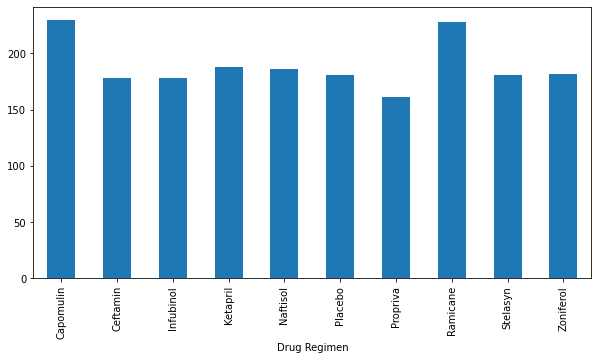

<Figure size 432x288 with 0 Axes>

In [18]:
grouped_regimen_list.plot(kind="bar", figsize=(10,5))
plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [ ]:
#medicine = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferal")
#y_pos = np.arange(len(medicine))
#performance = [200, 180, 160, 140, 120, 100, 80, 60, 40, 20, 1]

#plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
#plt.xticks(y_pos, medicine)

#plt.show()

In [ ]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#medicine = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferal")
#numbers = [230, 178, 178, 188, 186, 188, 181, 161, 288, 181, 182]
#ax.bar(medicine, numbers)
#plt.show()

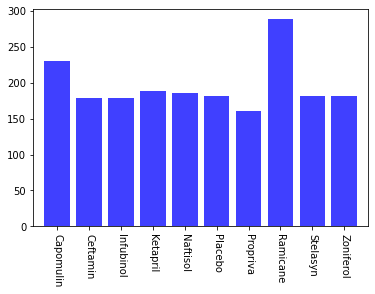

<Figure size 432x288 with 0 Axes>

In [70]:
medicine = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
numbers = [230, 178, 178, 188, 186, 181, 161, 288, 181, 182]

x_axis = np.arange(len(numbers))

plt.bar(x_axis, numbers, color = 'b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, medicine, rotation=-90)

plt.xlim(-0.75, len(x_axis)-0.25)

#plt.ylim(0, max(numbers)+100)
plt.show()
plt.tight_layout()

In [ ]:
#numbers = [230, 178, 178, 188, 186, 188, 181, 161, 288, 181, 182]

#x_axis = np.arange(len(grouped_regimen))

#plt.bar(x_axis, grouped_regimen, color = 'b', alpha=0.75, align='center')

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

#plt.xlim(-0.75, len(x_axis)-0.25)

#plt.ylim(0, max(numbers)+5)

#plt.show()
#plt.tight_layout()

## Pie Plots

In [24]:
#To make a pie chart for males and females i'll have to make a table seperating them
mouse_gender = merge_table.groupby(["Sex"])
all_mouse = mouse_gender.nunique()["Mouse ID"]
all_mouse

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [25]:
#For gender percentages
mouse_groupby = merge_table.groupby(["Mouse ID", "Sex"])
mouse_groupby

gender_mouse_df = pd.DataFrame(mouse_groupby.size())

gender_mouse = pd.DataFrame(gender_mouse_df.groupby(["Sex"]).count())
gender_mouse.columns =["Total Count"]

gender_mouse["Percentage of Sex"] = (100*(gender_mouse["Total Count"]/gender_mouse["Total Count"].sum()))

gender_mouse["Percentage of Sex"] = gender_mouse["Percentage of Sex"]

gender_mouse

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


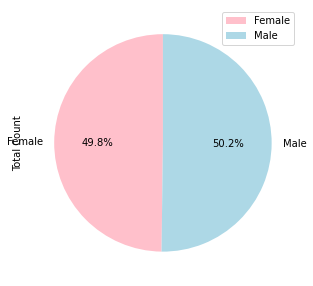

In [26]:
colors = ['pink', 'lightblue']
plot = gender_mouse.plot.pie(y='Total Count', figsize = (5,5), colors = colors, autopct="%1.1f%%", startangle=90)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x1a874ac5a30>,
 [Text(-1.0999781124353174, 0.0069391759767658615, 'Female'),
  Text(1.0999781124353174, -0.006939175976765996, 'Male')],
 [Text(-0.5999880613283548, 0.003785005078235924, '49.8%'),
  Text(0.5999880613283548, -0.0037850050782359972, '50.2%')])

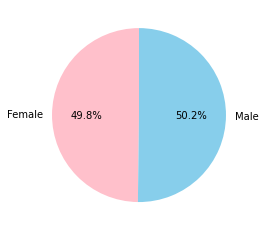

In [27]:
#labels
labels = ["Female", "Male"]

#size values of the section
sizes = [49.799197, 50.200803]

#Color set
colors = ['pink', 'skyblue']

#Piechart plot
plt.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", startangle=90)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [28]:
top_regimens = merge_table[merge_table["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
top_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [29]:
#this table was in ascending order
top_regimens = top_regimens.sort_values(['Timepoint'], ascending=True)
top_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [30]:
tr_new_table = top_regimens[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
tr_new_table

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [31]:
#This is to group the data
sort_test_regimens = tr_new_table.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
sort_test_regimens

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [32]:
#list of the top regimens
top_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
top_regimen

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

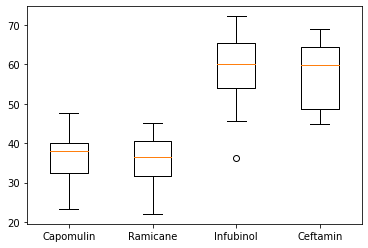

In [33]:
final_df = sort_test_regimens.reset_index()
tumor_volume_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_volume_list_df = pd.DataFrame(tumor_volume_list)

tumor_volume_list_df = tumor_volume_list_df.reindex(top_regimen)
tumor_volume = [volume for volume in tumor_volume_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=top_regimen)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [34]:
#To choose a specific mouse I used the '.isin()' function
specific_mouse = merge_table[merge_table['Mouse ID'].isin(['m957'])]
specific_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


In [35]:
#new tavle for timepoint vs tumor
tpoint_vs_tumorvol = specific_mouse[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
tpoint_vs_tumorvol

,Mouse ID,Timepoint,Tumor Volume (mm3)
135,m957,0,45.000000
136,m957,5,45.622381
137,m957,10,46.414518
138,m957,15,39.804453
139,m957,20,38.909349
140,m957,25,37.695432
141,m957,30,38.212479
142,m957,35,32.562839
143,m957,40,32.947615
144,m957,45,33.329098


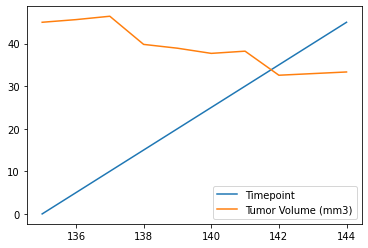

In [36]:
tpoint_vs_tumorvol_graph = tpoint_vs_tumorvol[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
tpoint_vs_tumorvol_graph.plot.line()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [37]:
#to get the table for the Capomulin only
capomulin_regiment = merge_table[merge_table['Drug Regimen'].isin(['Capomulin'])]
capomulin_regiment

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [38]:
weight_vs_tumorvol = capomulin_regiment[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
weight_vs_tumorvol

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [39]:
weight_vs_tumorvol_graph = weight_vs_tumorvol[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
weight_vs_tumorvol_graph = weight_vs_tumorvol_graph.sort_values(['Weight (g)'], ascending = True)
weight_vs_tumorvol_graph

,Mouse ID,Weight (g),Tumor Volume (mm3)
22,x401,15,39.113891
29,x401,15,28.484033
28,x401,15,28.167397
27,x401,15,30.206825
26,x401,15,32.915292
...,...,...,...
382,r944,25,45.737145
381,r944,25,45.000000
1454,r157,25,46.059608
390,r944,25,41.581521


In [40]:
weight_vs_tumorvol_graph_new = weight_vs_tumorvol_graph.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
weight_vs_tumorvol_graph_new

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [60]:
weight_vs_tumorvol_graph_df = pd.DataFrame(weight_vs_tumorvol_graph_new).reset_index()
weight_vs_tumorvol_graph_df

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


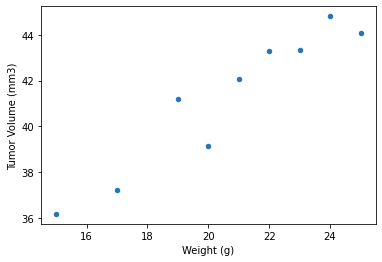

In [61]:
weight_vs_tumorvol_graph_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_tumorvol_graph_df["Weight (g)"]
y_values = weight_vs_tumorvol_graph_df["Tumor Volume (mm3)"]

In [68]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

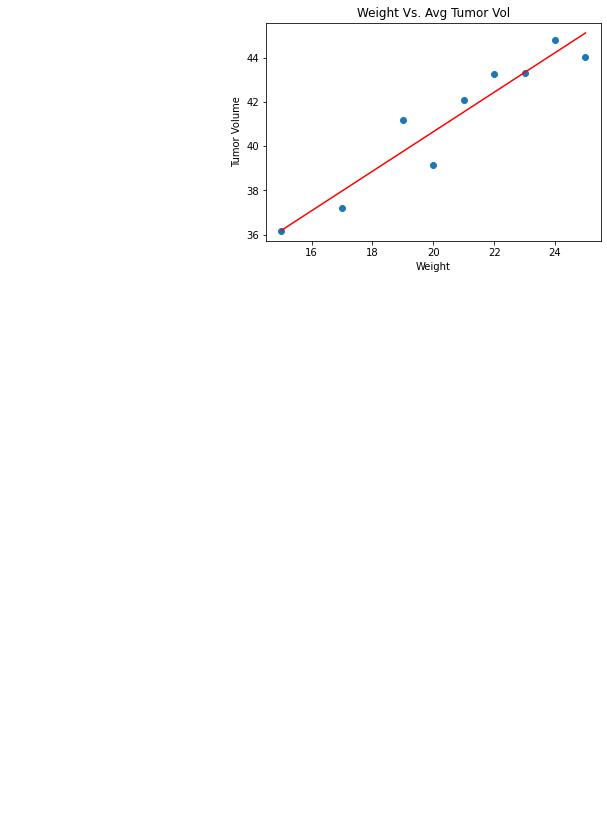

In [69]:
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()